In [1]:
import pickle
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import datetime 
import seaborn
from stats import is_significant, _permutation_test
import xlsxwriter 
from scipy import stats
import xarray as xr
from matplotlib import cm
  
# Plot specifications
seaborn.set(context='talk')
seaborn.set_style("whitegrid", {'axes.grid': False})
plt.rc('axes', edgecolor='black')
plt.rc('axes', edgecolor='black')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

subjectID = '018'
subjectIDs = ['018', '199','215','288','289','296','343','366','407','426']
score_name = '/om/user/msch/share/neural_nlp/benchmark=Pereira2018-encoding,model=gpt2-xl,subsample=None.pkl'

In [2]:
# Load score objects
with open(score_name, 'rb') as f:  
    result = pickle.load(f)

score = result['data']

In [3]:
from func import *

In [4]:
p=meanSplitExp(score)
p1=removeNaNs(p)
p1

/om/user/gretatu/.conda/envs/brainmodeling/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


['Number of NaNs: <xarray.DataArray ()>\narray(931)subjID: 018'
 'Number of NaNs: <xarray.DataArray ()>\narray(931)subjID: 018'
 'Number of NaNs: <xarray.DataArray ()>\narray(931)subjID: 018' ...
 'Number of NaNs: <xarray.DataArray ()>\narray(931)subjID: 215'
 'Number of NaNs: <xarray.DataArray ()>\narray(931)subjID: 215'
 'Number of NaNs: <xarray.DataArray ()>\narray(931)subjID: 288']


<xarray.Score (layer: 49, neuroid: 102861)>
array([[ 0.016596, -0.022679, -0.032394, ..., -0.024181, -0.06163 , -0.009732],
       [ 0.173553,  0.206669,  0.205365, ...,  0.016751,  0.037879,  0.264404],
       [ 0.227677,  0.241866,  0.255495, ...,  0.110407,  0.153849,  0.339121],
       ...,
       [ 0.314116,  0.320052,  0.283787, ...,  0.193317,  0.248321,  0.421078],
       [ 0.310855,  0.315696,  0.285951, ...,  0.194683,  0.251016,  0.423057],
       [ 0.307537,  0.315518,  0.291283, ...,  0.185806,  0.246282,  0.42345 ]])
Coordinates:
  * layer            (layer) object 'drop' 'encoder.h.0' ... 'encoder.h.47'
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '018' '018' '018' ... '018' '018' '018'
  - voxel_num        (neuroid) int64 28 29 31 32 38 64 ... 192 193 199 207 211
  - filter_strategy  (neuroid) object nan nan nan nan nan ... nan nan nan nan
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi          

In [5]:
p1.max() # not ceiled

<xarray.Score ()>
array(0.609132)

In [5]:
p1a=extractCoord(p1,'atlas','language')
p1a

<xarray.Score (layer: 49, neuroid: 13501)>
array([[ 0.016596, -0.022679, -0.032394, ..., -0.015848, -0.081229,  0.038621],
       [ 0.173553,  0.206669,  0.205365, ...,  0.200314,  0.202393,  0.26767 ],
       [ 0.227677,  0.241866,  0.255495, ...,  0.201463,  0.146722,  0.283015],
       ...,
       [ 0.314116,  0.320052,  0.283787, ...,  0.370537,  0.311778,  0.503579],
       [ 0.310855,  0.315696,  0.285951, ...,  0.364267,  0.293199,  0.508205],
       [ 0.307537,  0.315518,  0.291283, ...,  0.379251,  0.299826,  0.503284]])
Coordinates:
  * layer            (layer) object 'drop' 'encoder.h.0' ... 'encoder.h.47'
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '018' '018' '018' ... '018' '018' '018'
  - voxel_num        (neuroid) int64 28 29 31 32 38 64 ... 192 193 199 207 211
  - filter_strategy  (neuroid) object nan nan nan nan nan ... nan nan nan nan
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi           

In [6]:
p2=getLayerPref(p1a)
p2

<xarray.Score (neuroid: 13501)>
array([0.8125  , 0.625   , 0.145833, ..., 0.916667, 0.833333, 0.9375  ])
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '018' '018' '018' ... '018' '018' '018'
  - voxel_num        (neuroid) int64 28 29 31 32 38 64 ... 192 193 199 207 211
  - filter_strategy  (neuroid) object nan nan nan nan nan ... nan nan nan nan
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi              (neuroid) object 'LH_AntTemp' 'LH_AntTemp' ... 'LH_AntTemp'
  - indices_in_3d    (neuroid) int64 72505 72506 72584 ... 94736 94815 94866
  - col_to_coord_1   (neuroid) int64 62 63 62 63 63 63 64 ... 16 15 16 15 15 66
  - col_to_coord_2   (neuroid) int64 63 63 64 64 65 63 63 ... 58 59 59 60 61 61
  - col_to_coord_3   (neuroid) int64 10 10 10 10 10 11 11 ... 13 13 13 13 13 13
  - neuroid_id       (neuroid) object '018.28' '018.29' ... '018.207' '018.211'
  - atlas            (neuroid) object 'language

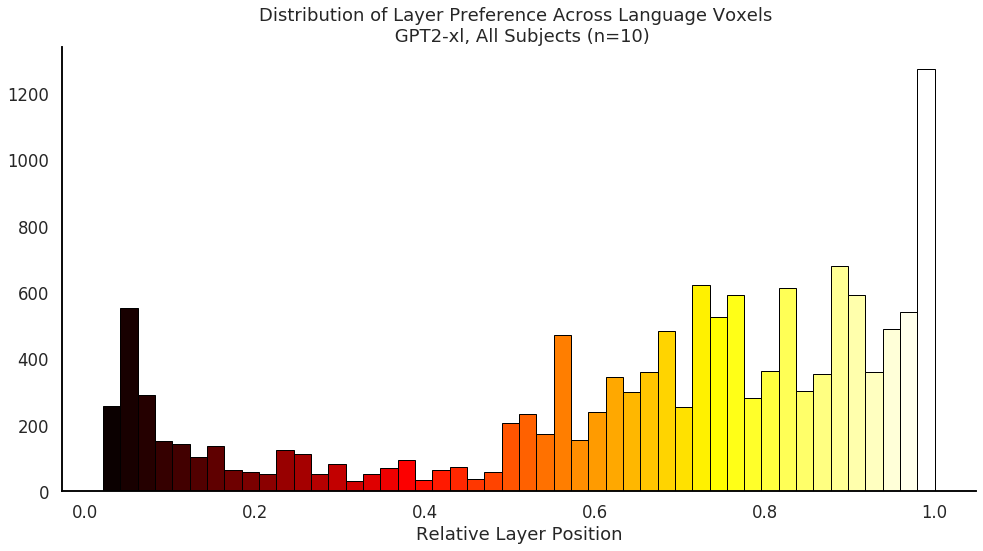

In [9]:
plotLayerPref(p2, 'Distribution of Layer Preference Across Language Voxels \n GPT2-xl, All Subjects (n=10)', \
             'AllSubs_voxel_distrib_lang_gpt2-xl.pdf')



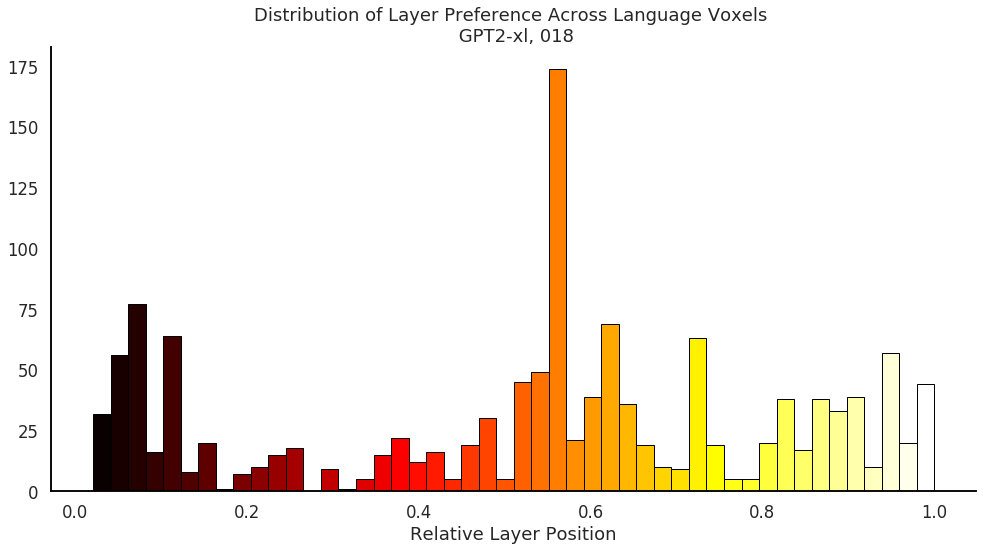

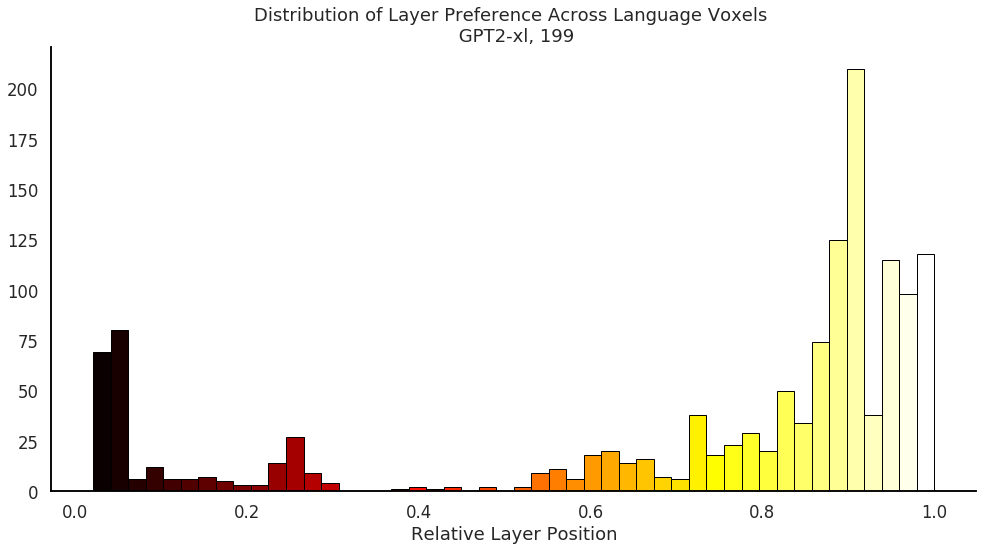

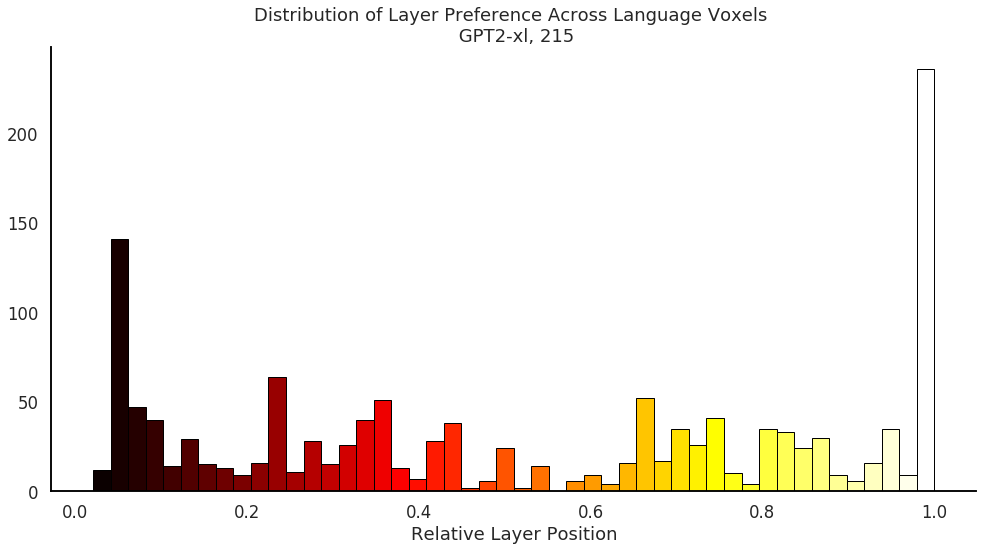

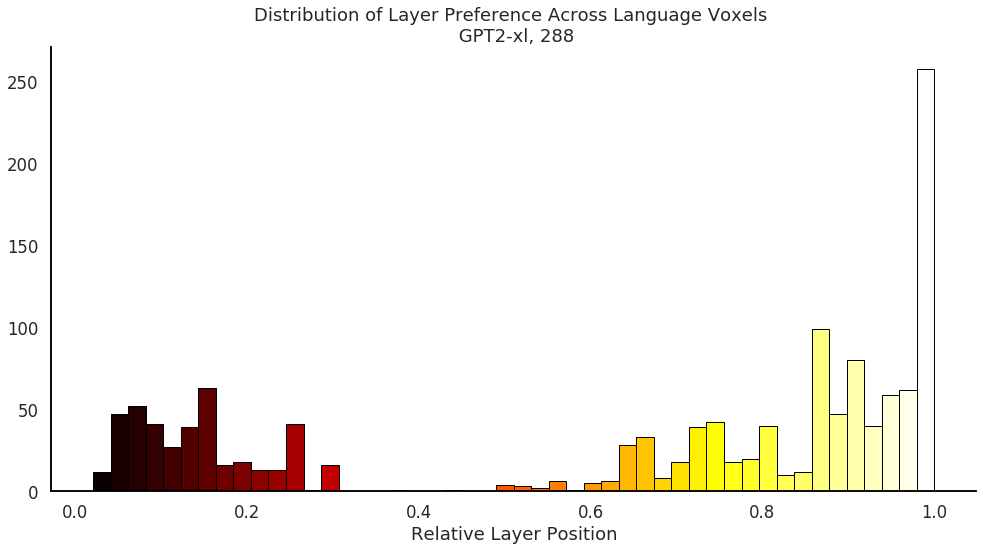

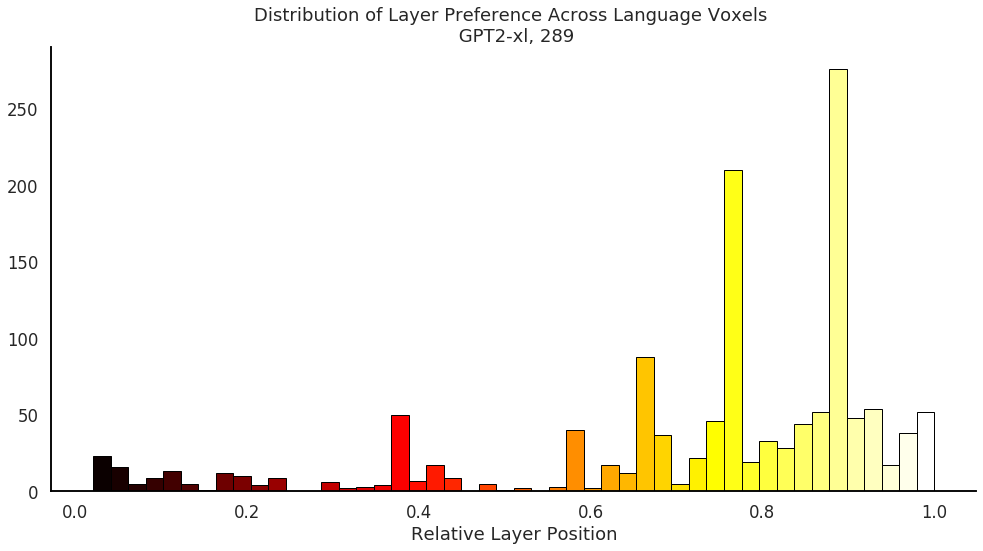

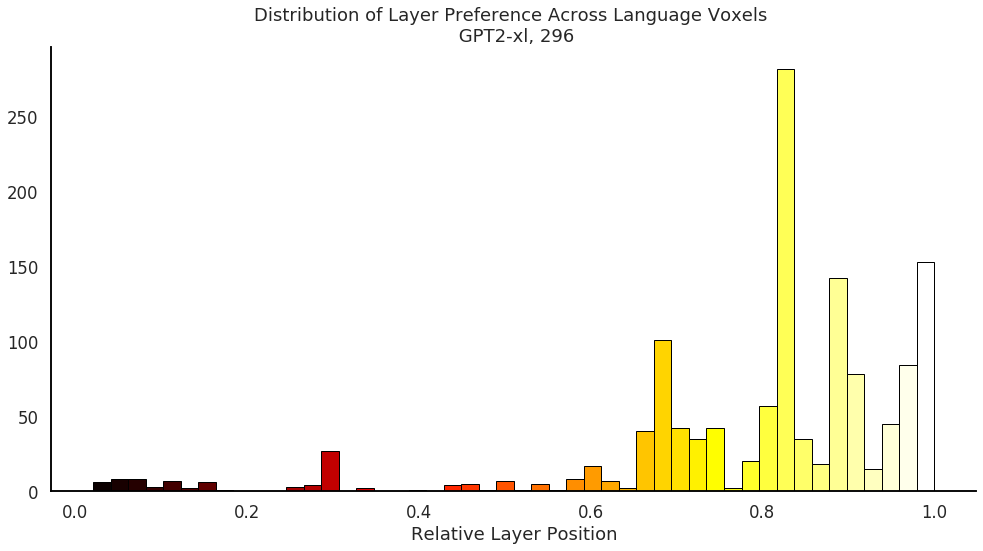

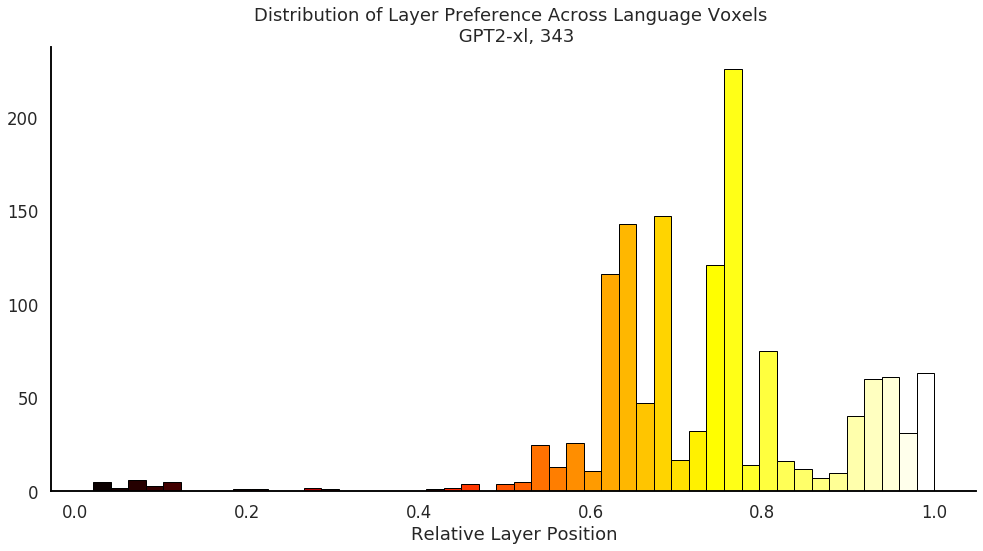

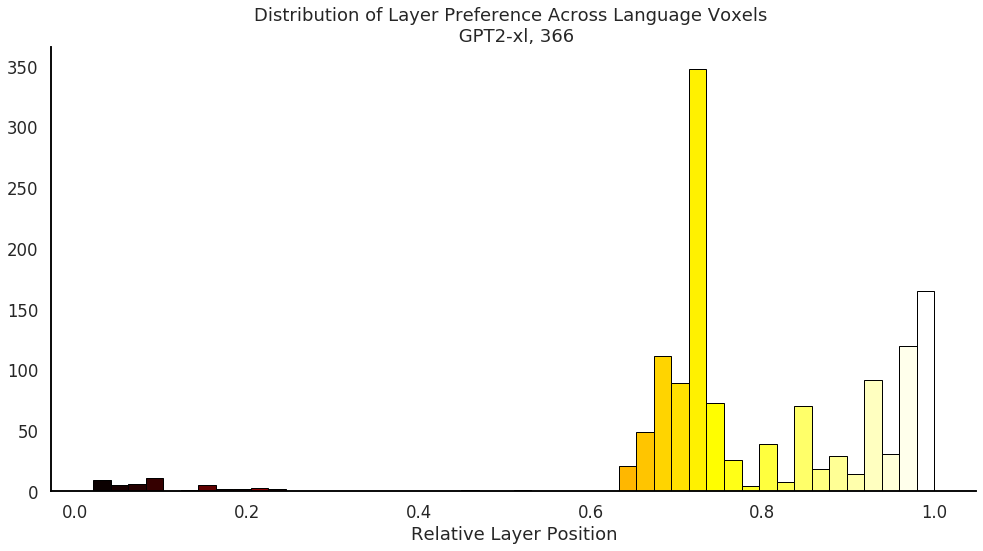

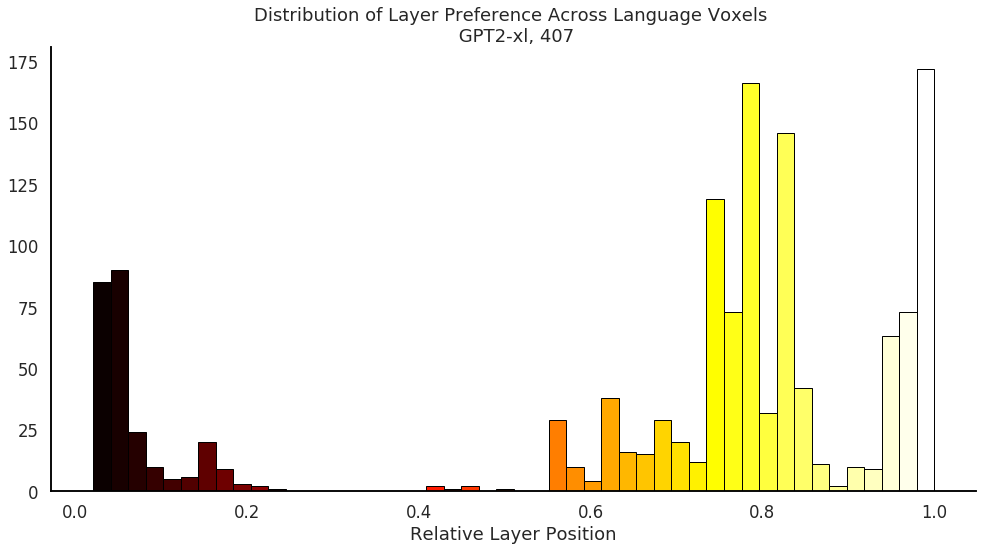

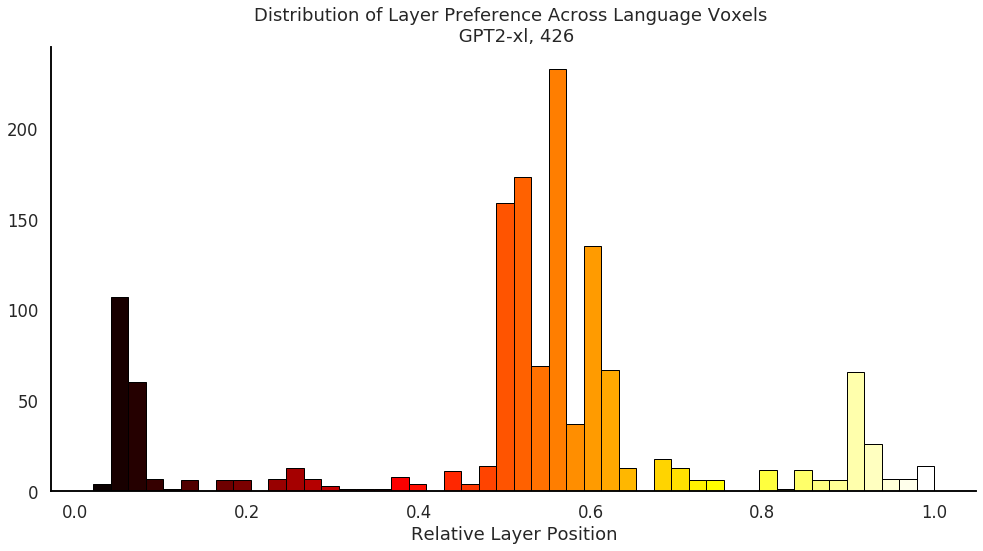

In [10]:
for subjectID in subjectIDs:
    
    p3=extractSubject(p2,subjectID)
    plotLayerPref(p3, 'Distribution of Layer Preference Across Language Voxels \n GPT2-xl, '+str(subjectID), \
             str(subjectID)+'_voxel_distrib__lang_gpt2-xl.pdf')

In [11]:
p3

<xarray.Score (neuroid: 1357)>
array([0.5625  , 0.5625  , 0.520833, ..., 0.041667, 0.1875  , 0.604167])
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '426' '426' '426' ... '426' '426' '426'
  - voxel_num        (neuroid) int64 95 96 102 103 104 ... 244 245 246 247 252
  - filter_strategy  (neuroid) object nan nan nan nan nan ... nan nan nan nan
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi              (neuroid) object 'RH_AntTemp' 'RH_AntTemp' ... 'LH_AntTemp'
  - indices_in_3d    (neuroid) int64 80042 80043 80121 ... 94630 94631 94707
  - col_to_coord_1   (neuroid) int64 15 16 15 16 17 16 65 ... 64 65 66 67 68 65
  - col_to_coord_2   (neuroid) int64 64 64 65 65 65 66 58 ... 58 58 58 58 58 59
  - col_to_coord_3   (neuroid) int64 11 11 11 11 11 11 12 ... 13 13 13 13 13 13
  - neuroid_id       (neuroid) object '426.95' '426.96' ... '426.247' '426.252'
  - atlas            (neuroid) object 'language'

In [20]:
p4=extractSubject(p2,subjectID)
p5=sortBy(p4)
p6=getUniqueNeuroIDs(p5)

In [21]:
p6

<xarray.Score (neuroid: 10316)>
array([0.8125  , 0.5     , 0.041667, ..., 0.0625  , 0.604167, 0.604167])
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - subject          (neuroid) object '426' '426' '426' ... '426' '426' '426'
  - voxel_num        (neuroid) int64 1000 10006 10007 ... 10057 10058 10059
  - filter_strategy  (neuroid) object nan nan nan nan nan ... nan nan nan nan
  - atlas_selection  (neuroid) object 'from90to100prcnt' ... 'from90to100prcnt'
  - roi              (neuroid) object 'LH_AntTemp' ... 'RH_PostTemp'
  - indices_in_3d    (neuroid) int64 124652 234955 234956 ... 235116 235117
  - col_to_coord_1   (neuroid) int64 69 9 10 12 13 11 14 ... 67 8 9 10 11 12 13
  - col_to_coord_2   (neuroid) int64 58 30 30 30 30 59 30 ... 32 32 32 32 32 32
  - col_to_coord_3   (neuroid) int64 17 32 32 32 32 17 32 ... 32 32 32 32 32 32
  - neuroid_id       (neuroid) object '426.1000' '426.10006' ... '426.10059'
  - atlas            (neuroid) object 'language' 'language' ... 'l

In [23]:
for subjectID in subjectIDs:
    fname = score_name.split('=')
    matfile_name = subjectID + '_LayerPref_' + fname[1][:-5] + fname[2][:-10] + '.mat'
    matfile_name = matfile_name.replace(',', '_')
    matfile_name = matfile_name.replace('-', '_')
    
    p4=extractSubject(p2,subjectID)
    p5=sortBy(p4)
    p6=getUniqueNeuroIDs(p5)
    
    writeToBrain(p6, matfile_name)